# Plot parameter results for I-FGSM and DeepFool

## Import results

In [24]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

ATTACK_METHOD = 'IFGSM'
epsilons = np.array([0.005, 0.01, 0.015, 0.02, 0.025, 0.03])
steps = np.array([2, 4, 6, 8, 10, 15, 20, 25])
with open("experiment_results/orig_Accuracy_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_Accuracy_arr = pickle.load(fp)
with open("experiment_results/orig_Target_Accuracy_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_Target_Accuracy_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Similarity_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_mean_similarity_arr = pickle.load(fp)
with open("experiment_results/orig_Std_Similarity_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_std_similarity_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Steps_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_mean_steps_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Epsilon_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_mean_epsilons_arr = pickle.load(fp)

ATTACK_METHOD = "DeepFool"
overshoots = np.array([0.005, 0.01, 0.015, 0.02, 0.025, 0.03])
max_iters = np.array([2, 4, 6, 8, 10, 12])

with open("experiment_results/Accuracy_" + ATTACK_METHOD + "_overshoot["+str(min(overshoots))+"-"+str(max(overshoots))+ "]_maxiter["+str(min(max_iters))+"-"+str(max(max_iters))+ "].npy", 'rb') as fp:
    DeepFool_Accuracy_arr_new = pickle.load(fp)
with open("experiment_results/Mean_Similarity_" + ATTACK_METHOD + "_overshoot["+str(min(overshoots))+"-"+str(max(overshoots))+ "]_maxiter["+str(min(max_iters))+"-"+str(max(max_iters))+ "].npy", 'rb') as fp:
    DeepFool_mean_similarity_arr_new = pickle.load(fp)
with open("experiment_results/Std_Similarity_" + ATTACK_METHOD + "_overshoot["+str(min(overshoots))+"-"+str(max(overshoots))+ "]_maxiter["+str(min(max_iters))+"-"+str(max(max_iters))+ "].npy", 'rb') as fp:
    DeepFool_std_similarity_arr_new = pickle.load(fp)

## Plot results

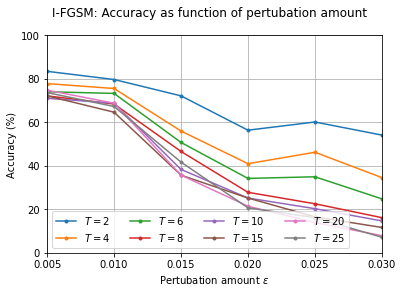

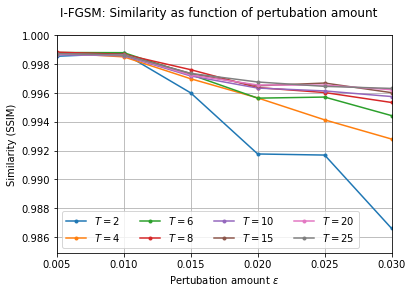

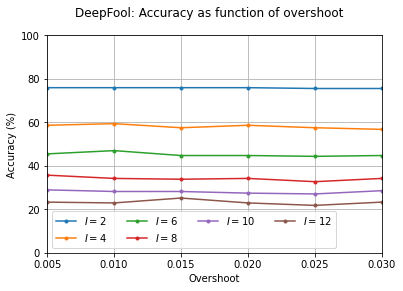

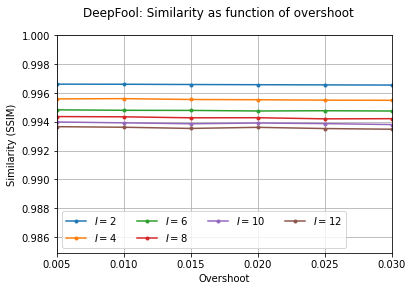

In [37]:
def plot_ifgsm_accuracy(epsilons, steps, data):
    fig, ax = plt.subplots()
    lines = ax.plot(epsilons, data, '.-')
    ax.set_xlabel('Pertubation amount $\epsilon$')
    ax.set_ylabel('Accuracy (%)')
    ax.set_xlim([epsilons[0], epsilons[-1]])
    ax.set_ylim([0, 100])
    ax.legend(iter(lines), ['$T='+str(step)+'$' for step in steps], loc='lower left', ncol=4)
    ax.grid('on')
    return fig

def plot_ifgsm_similarity(epsilons, steps, means, stds):
    fig, ax = plt.subplots()
    lines = ax.plot(epsilons, means, '.-')
    k = 1
#     for i in range(means.shape[1]):
#         ax.fill_between(epsilons, means[:,i]+k*stds[:,i], means[:,i]-k*stds[:,i], alpha=0.2)
    ax.set_xlabel('Pertubation amount $\epsilon$')
    ax.set_ylabel('Similarity (SSIM)')
    ax.set_xlim([epsilons[0], epsilons[-1]])
    ax.set_ylim([0.9849, 1])
    ax.legend(iter(lines), ['$T='+str(step)+'$' for step in steps], loc='lower left', ncol=4)
    ax.grid('on')
    return fig
    
def plot_deepfool_accuracy(overshoots, max_iters, data):
    fig, ax = plt.subplots()
    lines = ax.plot(overshoots, data, '.-')
    ax.set_xlabel('Overshoot')
    ax.set_ylabel('Accuracy (%)')
    ax.set_xlim([overshoots[0], overshoots[-1]])
    ax.set_ylim([0, 100])
    ax.legend(iter(lines), ['$I='+str(it)+'$' for it in max_iters], loc='lower left', ncol=4)
    ax.grid('on')
    return fig

def plot_deepfool_similarity(overshoots, max_iters, means, stds):
    fig, ax = plt.subplots()
    lines = ax.plot(overshoots, means, '.-')
    k = 1
#     for i in range(means.shape[1]):
#         ax.fill_between(overshoots, means[:,i]+k*stds[:,i], means[:,i]-k*stds[:,i], alpha=0.2)
    ax.set_xlabel('Overshoot')
    ax.set_ylabel('Similarity (SSIM)')
    ax.set_xlim([overshoots[0], overshoots[-1]])
    ax.set_ylim([0.9849, 1])
    ax.legend(iter(lines), ['$I='+str(it)+'$' for it in max_iters], loc='lower left', ncol=4)
    ax.grid('on')
    return fig

#def plot_all_accuracy_similarity(IFGSM_accuracy, IFGSM_similarity, DeepFool_accuracy, DeepFool_similarity):
#    fig, ax = plt.subplots()
#    lines1 = ax.plot(IFGSM_similarity, IFGSM_accuracy, '.-')
#    lines2 = ax.plot(DeepFool_similarity, DeepFool_accuracy, '.-')
#    k = 1
#
#    ax.set_xlabel('Similarity (SSIM)')
#    ax.set_ylabel('Accuracy (%)')
#    ax.set_xlim([min(IFGSM_similarity[0],DeepFool_similarity[0]),1])
#    ax.set_ylim([min(DeepFool_accuracy[0],IFGSM_accuracy[0]), max(DeepFool_accuracy[-1],IFGSM_accuracy[-1])])
#    ax.legend(["I-FGSM","DeepFool"] ,loc='lower left', ncol=2)
#    ax.grid('on')
#    return fig 

def plot_all_accuracy_similarity(IFGSM_accuracy, IFGSM_similarity, DeepFool_accuracy, DeepFool_similarity):
    fig, ax = plt.subplots()
    lines2 = ax.plot(DeepFool_similarity, DeepFool_accuracy, 'd:k')
    lines1 = ax.plot(IFGSM_similarity, IFGSM_accuracy, 's-k')
    k = 1

    ax.set_xlabel('Similarity (SSIM)')
    ax.set_ylabel('Accuracy (%)')
    ax.set_xlim([min(IFGSM_similarity[0],DeepFool_similarity[0]),1])
    ax.set_ylim([0, 100])
    ax.legend(["DeepFool", "I-FGSM"] , loc='upper left', ncol=1)
    ax.grid('on')
    return fig 
    
fig = plot_ifgsm_accuracy(epsilons, steps, orig_IFGSM_Accuracy_arr)
fig.suptitle('I-FGSM: Accuracy as function of pertubation amount')
plt.savefig('res_ifgsm_acc.pdf')

fig = plot_ifgsm_similarity(epsilons, steps, orig_IFGSM_mean_similarity_arr, orig_IFGSM_std_similarity_arr)
fig.suptitle('I-FGSM: Similarity as function of pertubation amount')
plt.savefig('res_ifgsm_sim.pdf')

fig = plot_deepfool_accuracy(overshoots, max_iters, DeepFool_Accuracy_arr_new)
fig.suptitle('DeepFool: Accuracy as function of overshoot')
plt.savefig('res_deepfool_acc.pdf')

fig = plot_deepfool_similarity(overshoots, max_iters, DeepFool_mean_similarity_arr_new, DeepFool_std_similarity_arr_new)
fig.suptitle('DeepFool: Similarity as function of overshoot')
plt.savefig('res_deepfool_sim.pdf')


#IFGSM_Accuracy = np.array([orig_IFGSM_Accuracy_arr[1,1],orig_IFGSM_Accuracy_arr[2,1],orig_IFGSM_Accuracy_arr[2,3],\
#                         orig_IFGSM_Accuracy_arr[2,5],orig_IFGSM_Accuracy_arr[3,3],orig_IFGSM_Accuracy_arr[4,3]])
#IFGSM_Mean_Similarity = np.array([orig_IFGSM_mean_similarity_arr[1,1],orig_IFGSM_mean_similarity_arr[2,1],orig_IFGSM_mean_similarity_arr[2,3],\
#                         orig_IFGSM_mean_similarity_arr[2,5],orig_IFGSM_mean_similarity_arr[3,3],orig_IFGSM_mean_similarity_arr[4,3]])

#DeepFool_Accuracy = DeepFool_Accuracy_arr_new[0,:]
#DeepFool_Mean_Similarity = DeepFool_mean_similarity_arr_new[0,:]





plt.show()

## Import Results for Accuracy and Similarity Comparison

In [26]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

ATTACK_METHOD = 'IFGSM'
sim_thresholds = np.array([0.9930,0.9935,0.9940,0.9945,0.9950,0.9955,0.9960,0.9965,0.997,0.9975,0.998,0.9985,0.999,0.9995,0.9999])

with open("experiment_results/orig_Accuracy_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_IFGSM_Accuracy_arr = pickle.load(fp)
with open("experiment_results/orig_Target_Accuracy_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_IFGSM_Target_Accuracy_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Similarity_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_IFGSM_mean_similarity_arr = pickle.load(fp)
with open("experiment_results/orig_Std_Similarity_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_IFGSM_std_similarity_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Steps_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_IFGSM_mean_steps_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Epsilon_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_IFGSM_mean_epsilons_arr = pickle.load(fp)

ATTACK_METHOD = "DeepFool"

#from first experiment
with open("experiment_results/orig_Accuracy_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_DeepFool_Accuracy_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Similarity_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_DeepFool_mean_similarity_arr = pickle.load(fp)
with open("experiment_results/orig_Std_Similarity_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_DeepFool_std_similarity_arr = pickle.load(fp)
#from second experiment for lower accuracy values

sim_thresholds = np.array([0.968,0.97,0.98,0.985])
with open("experiment_results/2orig_Accuracy_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_DeepFool_Accuracy_arr2 = pickle.load(fp)
with open("experiment_results/2orig_Mean_Similarity_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_DeepFool_mean_similarity_arr2 = pickle.load(fp)
with open("experiment_results/2orig_Std_Similarity_" + ATTACK_METHOD + "_thr["+str(min(sim_thresholds))+"-"+str(max(sim_thresholds))+ "].npy", 'rb') as fp:
    last_DeepFool_std_similarity_arr2 = pickle.load(fp)

In [27]:
print("I-FGSM Accuracy:",last_IFGSM_Accuracy_arr)
print("I-FGSM Similarity:",last_IFGSM_mean_similarity_arr)
print("DeepFool Accuracy:",last_DeepFool_Accuracy_arr)
print("DeepFool Similarity:",last_DeepFool_mean_similarity_arr)
print("DeepFool Accuracy2:",last_DeepFool_Accuracy_arr2)
print("DeepFool Similarity2:",last_DeepFool_mean_similarity_arr2)

last_DeepFool_Accuracy_arr = np.concatenate((last_DeepFool_Accuracy_arr2[2:],last_DeepFool_Accuracy_arr))
last_DeepFool_mean_similarity_arr = np.concatenate((last_DeepFool_mean_similarity_arr2[2:],last_DeepFool_mean_similarity_arr))

print("DeepFool Accuracy after concatenation:",last_DeepFool_Accuracy_arr)
print("DeepFool Similarity after concatenation:",last_DeepFool_mean_similarity_arr)

I-FGSM Accuracy: [10.9023 12.782  18.4211 15.7895 19.5489 24.0602 25.5639 34.2105 37.218
 40.6015 50.7519 61.2782 74.0602 75.9398 77.4436]
I-FGSM Similarity: [0.99250758 0.99299872 0.99352878 0.99397814 0.99445981 0.99489933
 0.99539977 0.99591696 0.99636185 0.99669999 0.99716085 0.99774307
 0.99836743 0.99860936 0.99864769]
DeepFool Accuracy: [25.9398 26.6917 27.8195 27.8195 29.3233 30.4511 33.4586 35.3383 38.3459
 42.1053 45.4887 53.3835 64.6617 81.9549 95.8647]
DeepFool Similarity: [0.99562931 0.9957943  0.99598312 0.99610877 0.99627686 0.99641293
 0.99667096 0.99689913 0.99719447 0.9974739  0.99782938 0.99830776
 0.99898285 0.99954271 0.99997765]
DeepFool Accuracy2: [ 5.6391  7.1429 10.9023 14.2857]
DeepFool Similarity2: [0.99263251 0.99271971 0.99342942 0.99395245]
DeepFool Accuracy after concatenation: [10.9023 14.2857 25.9398 26.6917 27.8195 27.8195 29.3233 30.4511 33.4586
 35.3383 38.3459 42.1053 45.4887 53.3835 64.6617 81.9549 95.8647]
DeepFool Similarity after concatenation: 

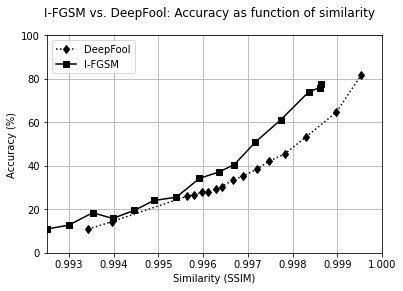

In [39]:
fig = plot_all_accuracy_similarity(last_IFGSM_Accuracy_arr, last_IFGSM_mean_similarity_arr, last_DeepFool_Accuracy_arr[:-1], last_DeepFool_mean_similarity_arr[:-1])
fig.suptitle('I-FGSM vs. DeepFool: Accuracy as function of similarity')
plt.savefig('res_ifgsm_deepfool_acc_sim.pdf')
plt.show()